# 0 Utils

In [43]:
import numpy as np
import pandas as pd
import nibabel as nib
from scipy import stats

import seaborn as sn
import matplotlib.pyplot as plt

In [3]:
# 기존: npy 파일 shape (roi=22개, timeseries=1200개)
#demo = np.loadtxt('demo.txt',delimiter='\t',dtype='str')
L = 383 #timeseries
S = 5 #starting point(앞 5개는 outlier라서 제거합니다!)

In [4]:
def write_txt(list, fname, sep) :
    file = open(fname, 'w')
    vstr = ''
    for a in list :
        vstr = vstr + str(a) + sep
    vstr = vstr.rstrip(sep)  # 마지막에도 추가되는  sep을 삭제 
    file.writelines(vstr)      # 한 라인씩 저장 
    file.close()

    print('done!')

subject NDARINVXJ93E5N3에 대한 분석

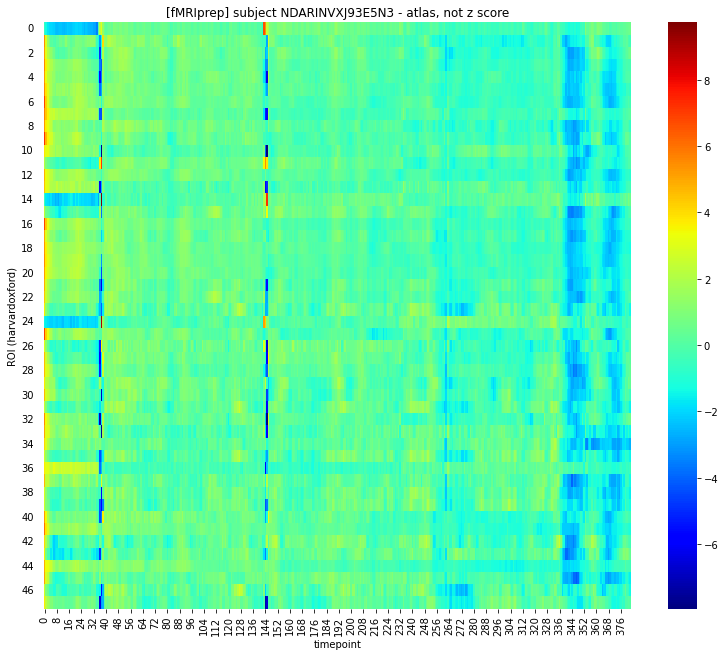

In [46]:
f, ax = plt.subplots(figsize=(11, 9))
plt.tick_params(bottom='on')

ax = sn.heatmap(data1, cmap='jet', cbar=True) #초반 outlier는 제외하였습니다.
cbar_kws={"orientation": "horizontal", "pad":0.15}
ax.tick_params(axis='y', length=0, labelrotation=0, pad=10)
ax.set_ylabel('ROI (harvardoxford)')
ax.set_xlabel('timepoint')

plt.tight_layout() # 이미 z scoring 된 값!

plt.title('[fMRIprep] subject NDARINVXJ93E5N3 - atlas, not z score') #timepoint 72 근처에서 outlier가 나옵니다.
plt.show()

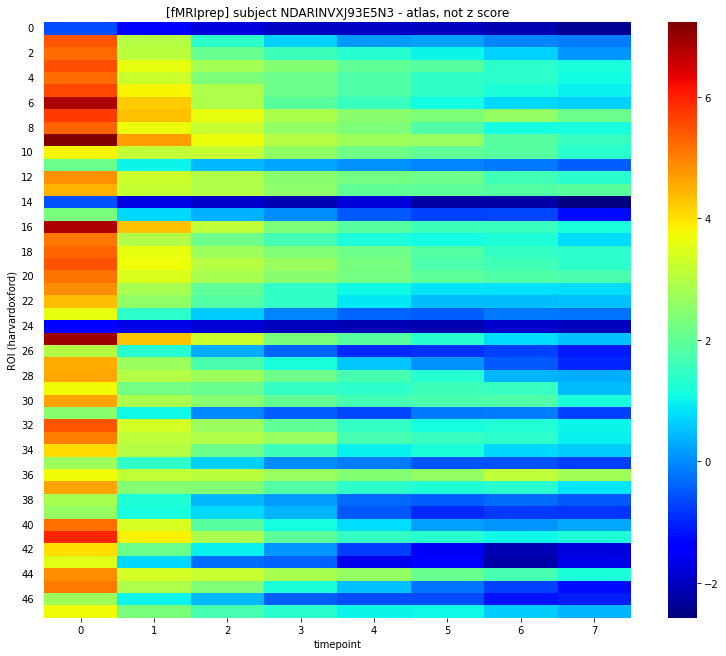

In [45]:
f, ax = plt.subplots(figsize=(11, 9))
plt.tick_params(bottom='on')

ax = sn.heatmap(data1[:,:8], cmap='jet', cbar=True) #초반 outlier는 제외하였습니다.
cbar_kws={"orientation": "horizontal", "pad":0.15}
ax.tick_params(axis='y', length=0, labelrotation=0, pad=10)
ax.set_ylabel('ROI (harvardoxford)')
ax.set_xlabel('timepoint')

plt.tight_layout() # 이미 z scoring 된 값!

plt.title('[fMRIprep] subject NDARINVXJ93E5N3 - atlas, not z score') #timepoint 72 근처에서 outlier가 나옵니다.
plt.show()

# 1 fMRIprep + atlas

In [44]:
subject_string = 'fmriprep-deri-NDARINVXJ93E5N3'
subject_num = 'NDARINVXJ93E5N3'

#harvardoxford (383,48)
filename_dir = '/share/scratch/transformer_Sangyoon/abcd-fmriprep-rs-time/' + subject_string + '/fmriprep/sub-' + subject_num + '/ses-baselineYear1Arm1/func/'
filename_full = filename_dir+'sub-'+subject_num+'_ses-baselineYear1Arm1_task-rest_run-1_space-MNIPediatricAsym_cohort-4_res-2_desc-preproc_atlas-harvardoxford_timeseries.npy'
data1 = np.load(filename_full).T;  #(48, 383)

In [8]:
data1.shape

(48, 383)

## 1-1 no z score , fmri prep, atlas

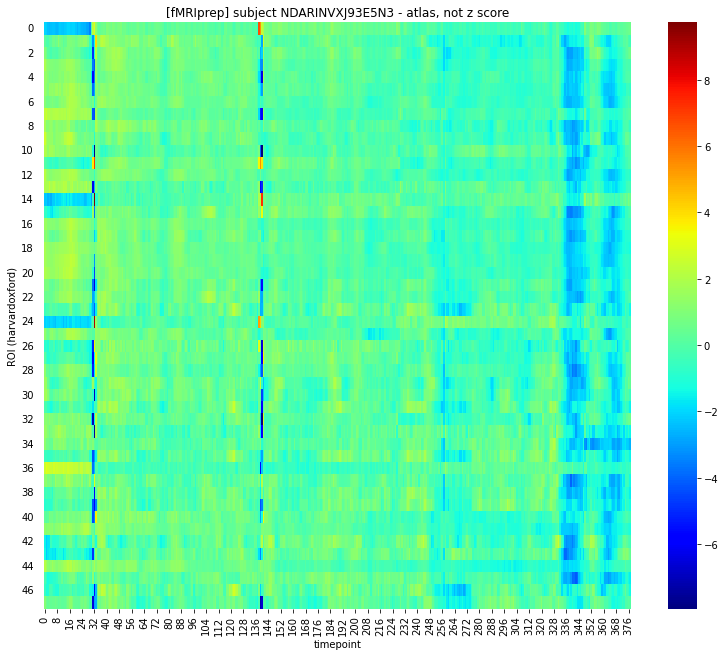

In [9]:
f, ax = plt.subplots(figsize=(11, 9))
plt.tick_params(bottom='on')

ax = sn.heatmap(data1[:,5:], cmap='jet', cbar=True) #초반 outlier는 제외하였습니다.
cbar_kws={"orientation": "horizontal", "pad":0.15}
ax.tick_params(axis='y', length=0, labelrotation=0, pad=10)
ax.set_ylabel('ROI (harvardoxford)')
ax.set_xlabel('timepoint')

plt.tight_layout() # 이미 z scoring 된 값!

plt.title('[fMRIprep] subject NDARINVXJ93E5N3 - atlas, not z score') #timepoint 72 근처에서 outlier가 나옵니다.
plt.show()

## 1-2 z score, fmri prep, atlas

In [10]:
z_sequence_1 = stats.zscore(data1[:,5:], axis=1)

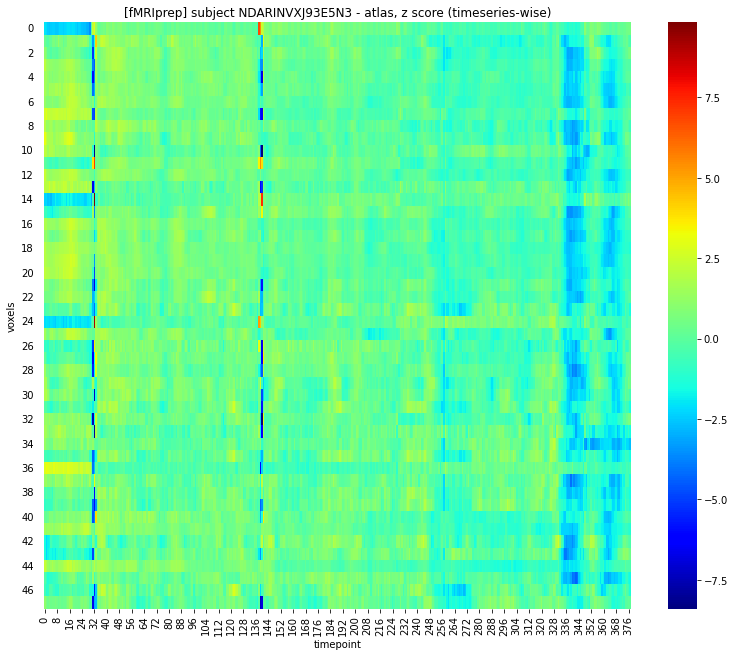

In [11]:
f, ax = plt.subplots(figsize=(11, 9))
plt.tick_params(bottom='on')

ax = sn.heatmap(z_sequence_1, cmap='jet', cbar=True)
cbar_kws={"orientation": "horizontal", "pad":0.15}
ax.tick_params(axis='y', length=0, labelrotation=0, pad=10)
ax.set_ylabel('voxels')
ax.set_xlabel('timepoint')

plt.tight_layout()

plt.title('[fMRIprep] subject NDARINVXJ93E5N3 - atlas, z score (timeseries-wise)') #timepoint 72에서 outlier가 나옵니다.
plt.show()

outliers are in timepoint 31, 32, 138, 139, 140

In [12]:
outlier_timepoint = []
for i in range (z_sequence_1.shape[0]):
    for j in range (z_sequence_1.shape[1]):
        if z_sequence_1[i][j] > 5 or z_sequence_1[i][j] < -5:
            outlier_timepoint.append(j)
outlier_timepoint_set = set(outlier_timepoint)
outlier_timepoint_fmriprep = sorted(list(outlier_timepoint_set))

In [13]:
outlier_timepoint_fmriprep

[31, 32, 138, 139, 140]

## 1-3 remove outliers, z score, fmri prep, atlas

In [ ]:
# remove outliers
tmp1=data1[:, 80:215]
tmp2=data1[:, 230:350]
tmp=np.concatenate((tmp1, tmp2), axis=1)

In [ ]:
tmp.shape

In [ ]:
z_sequence_11 = stats.zscore(tmp, axis=1)

In [ ]:
f, ax = plt.subplots(figsize=(11, 9))
plt.tick_params(bottom='on')

ax = sn.heatmap(z_sequence_11, cmap='jet', cbar=True)
cbar_kws={"orientation": "horizontal", "pad":0.15}
ax.tick_params(axis='y', length=0, labelrotation=0, pad=10)
ax.set_ylabel('voxels')
ax.set_xlabel('timepoint')

plt.tight_layout()

plt.title('[fMRIprep] subject NDARINVXJ93E5N3 - without outliers, atlas, z score (timeseries-wise)')
plt.show()

## 1-4 motion이랑 합쳐보기

In [15]:
motion = pd.read_csv("sub-NDARINVXJ93E5N3_ses-baselineYear1Arm1_task-rest_run-01_motion.tsv", delimiter='\t')

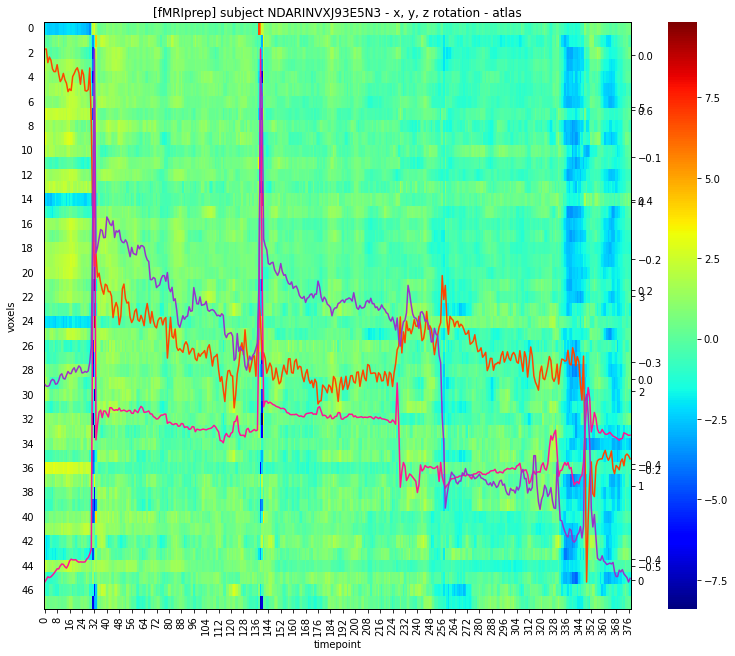

In [16]:
f, ax = plt.subplots(figsize=(11, 9))
plt.tick_params(bottom='on')

ax = sn.heatmap(z_sequence_1, cmap='jet', cbar=True)
cbar_kws={"orientation": "horizontal", "pad":0.15}
ax.tick_params(axis='y', length=0, labelrotation=0, pad=10)
ax.set_ylabel('voxels')
ax.set_xlabel('timepoint')

ax2 = ax.twinx()
z_rotation = list(np.array(motion.iloc[5:, 1:2]).reshape(-1,))
ax2.plot(z_rotation, color='orangered')
line1 = ax2.lines[0] # get the line
line1.set_xdata(line1.get_xdata()+ 0.5)
#ax2.set_ylabel('z rotation (radian)')

ax3 = ax.twinx()
x_rotation = list(np.array(motion.iloc[5:, 2:3]).reshape(-1,))
ax3.plot(x_rotation, color='deeppink')
line2 = ax3.lines[0] # get the line
line2.set_xdata(line2.get_xdata()+ 0.5)
#ax3.set_ylabel('x rotation (radian)')

ax4 = ax.twinx()
y_rotation = list(np.array(motion.iloc[5:, 3:4]).reshape(-1,))
ax4.plot(y_rotation, color='darkorchid')
line3 = ax4.lines[0] # get the line
line3.set_xdata(line3.get_xdata()+ 0.5)
#ax4.set_ylabel('y rotation (radian)')

ax.axis('tight')
ax2.axis('tight')
ax3.axis('tight')
ax4.axis('tight')

plt.tight_layout()

plt.title('[fMRIprep] subject NDARINVXJ93E5N3 - x, y, z rotation - atlas') #timepoint 332에서 outlier가 나옵니다.
plt.show()

outliers are in timepoint 31, 32, 138, 139, 140

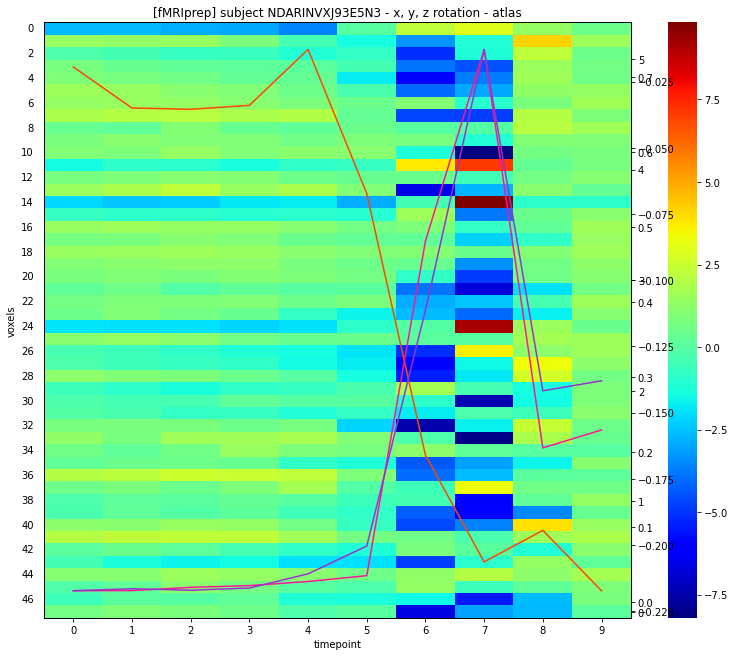

In [17]:
f, ax = plt.subplots(figsize=(11, 9))
plt.tick_params(bottom='on')

ax = sn.heatmap(z_sequence_1[:, 25:35], cmap='jet', cbar=True)
cbar_kws={"orientation": "horizontal", "pad":0.15}
ax.tick_params(axis='y', length=0, labelrotation=0, pad=10)
ax.set_ylabel('voxels')
ax.set_xlabel('timepoint')

ax2 = ax.twinx()
z_rotation = list(np.array(motion.iloc[30:40, 1:2]).reshape(-1,))
ax2.plot(z_rotation, color='orangered')
line1 = ax2.lines[0] # get the line
line1.set_xdata(line1.get_xdata()+ 0.5)
#ax2.set_ylabel('z rotation (radian)')

ax3 = ax.twinx()
x_rotation = list(np.array(motion.iloc[30:40, 2:3]).reshape(-1,))
ax3.plot(x_rotation, color='deeppink')
line2 = ax3.lines[0] # get the line
line2.set_xdata(line2.get_xdata()+ 0.5)
#ax3.set_ylabel('x rotation (radian)')

ax4 = ax.twinx()
y_rotation = list(np.array(motion.iloc[30:40, 3:4]).reshape(-1,))
ax4.plot(y_rotation, color='darkorchid')
line3 = ax4.lines[0] # get the line
line3.set_xdata(line3.get_xdata()+ 0.5)
#ax4.set_ylabel('y rotation (radian)')

ax.axis('tight')
ax2.axis('tight')
ax3.axis('tight')
ax4.axis('tight')

plt.tight_layout()

plt.title('[fMRIprep] subject NDARINVXJ93E5N3 - x, y, z rotation - atlas') #timepoint 15에서 outlier가 나옵니다.
plt.show()

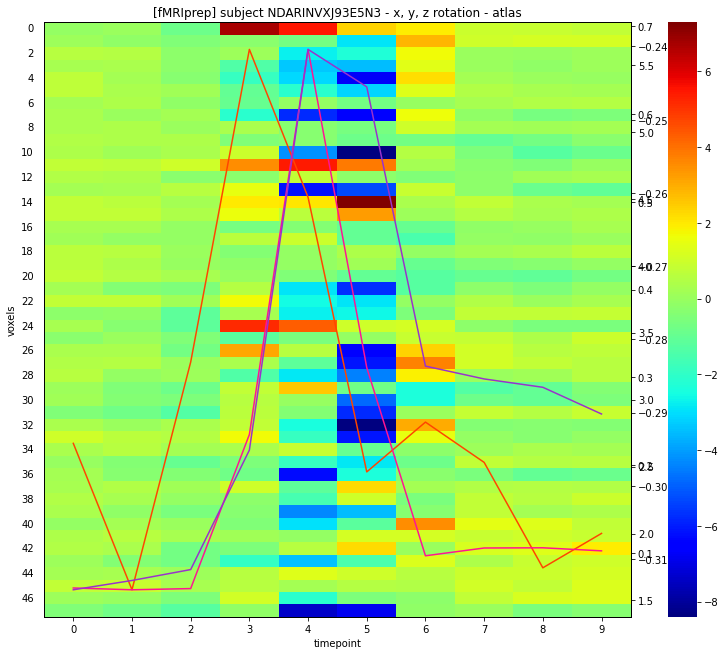

In [18]:
f, ax = plt.subplots(figsize=(11, 9))
plt.tick_params(bottom='on')

ax = sn.heatmap(z_sequence_1[:, 135:145], cmap='jet', cbar=True)
cbar_kws={"orientation": "horizontal", "pad":0.15}
ax.tick_params(axis='y', length=0, labelrotation=0, pad=10)
ax.set_ylabel('voxels')
ax.set_xlabel('timepoint')

ax2 = ax.twinx()
z_rotation = list(np.array(motion.iloc[140:150, 1:2]).reshape(-1,))
ax2.plot(z_rotation, color='orangered')
line1 = ax2.lines[0] # get the line
line1.set_xdata(line1.get_xdata()+ 0.5)
#ax2.set_ylabel('z rotation (radian)')

ax3 = ax.twinx()
x_rotation = list(np.array(motion.iloc[140:150, 2:3]).reshape(-1,))
ax3.plot(x_rotation, color='deeppink')
line2 = ax3.lines[0] # get the line
line2.set_xdata(line2.get_xdata()+ 0.5)
#ax3.set_ylabel('x rotation (radian)')

ax4 = ax.twinx()
y_rotation = list(np.array(motion.iloc[140:150, 3:4]).reshape(-1,))
ax4.plot(y_rotation, color='darkorchid')
line3 = ax4.lines[0] # get the line
line3.set_xdata(line3.get_xdata()+ 0.5)
#ax4.set_ylabel('y rotation (radian)')

ax.axis('tight')
ax2.axis('tight')
ax3.axis('tight')
ax4.axis('tight')

plt.tight_layout()

plt.title('[fMRIprep] subject NDARINVXJ93E5N3 - x, y, z rotation - atlas') #timepoint 60, 61, 62, 63, 70, 71, 72, 73에서 outlier가 나옵니다.
plt.show()

# 2 fMRIprep

In [ ]:
pwd

In [30]:
data2=nib.load('sub-NDARINVXJ93E5N3_ses-baselineYear1Arm1_task-rest_run-1_space-MNIPediatricAsym_cohort-4_res-2_desc-preproc_bold.nii.gz')
data2_arr=np.array(data2.dataobj)

In [31]:
data2_arr.shape 

(99, 117, 95, 383)

In [32]:
data2_arr

array([[[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         ...,
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

        [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          -2.44848635e-02, -5.90106905e-01,  1.46402776e-01],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          -1.55153079e

In [47]:
nonoutlier = data2_arr.reshape(-1, 383) #초반 outlier 제거하지 않은 버전

In [51]:
nonoutlier_z = stats.zscore(nonoutlier, axis=1)

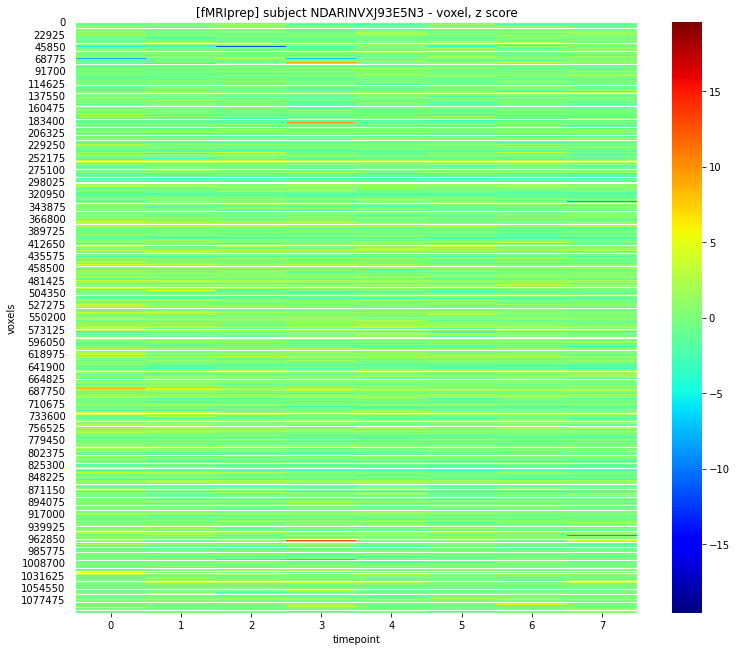

In [53]:
f, ax = plt.subplots(figsize=(11, 9))
plt.tick_params(bottom='on')

ax = sn.heatmap(nonoutlier_z[:, :8], cmap='jet', cbar=True)
cbar_kws={"orientation": "horizontal", "pad":0.15}
ax.tick_params(axis='y', length=0, labelrotation=0, pad=10)
ax.set_ylabel('voxels')
ax.set_xlabel('timepoint')

plt.tight_layout()

plt.title('[fMRIprep] subject NDARINVXJ93E5N3 - voxel, z score')
plt.show()

In [33]:
data2_arr_=data2_arr[:, :, :, 5:] #초반 outlier 5개 제거 (조건을 똑같이 맞춰주기 위함)

In [34]:
data2_arr__ = data2_arr_.reshape(-1, 378) # 앞에꺼 쭉 펴줌

In [35]:
data2_arr__.shape

(1100385, 378)

In [36]:
data2_arr__

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## 2-1 no z score, fmri prep, voxels

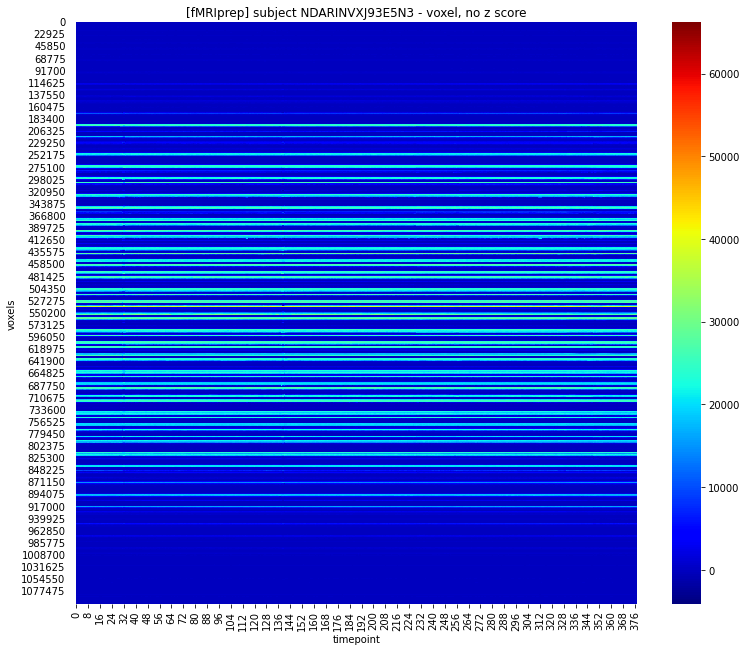

In [37]:
f, ax = plt.subplots(figsize=(11, 9))
plt.tick_params(bottom='on')

ax = sn.heatmap(data2_arr__, cmap='jet', cbar=True)
cbar_kws={"orientation": "horizontal", "pad":0.15}
ax.tick_params(axis='y', length=0, labelrotation=0, pad=10)
ax.set_ylabel('voxels')
ax.set_xlabel('timepoint')

plt.tight_layout()

plt.title('[fMRIprep] subject NDARINVXJ93E5N3 - voxel, no z score') #timepoint 332에서 outlier가 나옵니다.
plt.show()

## 2-2 z score, fmri prep, voxels

In [ ]:
z_sequence_2 = stats.zscore(data2_arr__) #voxel-wise하게 z scoring

In [ ]:
z_sequence_2

In [ ]:
f, ax = plt.subplots(figsize=(11, 9))
plt.tick_params(bottom='on')

ax = sn.heatmap(z_sequence_2, cmap='jet', cbar=True)
cbar_kws={"orientation": "horizontal", "pad":0.15}
ax.tick_params(axis='y', length=0, labelrotation=0, pad=10)
ax.set_ylabel('voxels')
ax.set_xlabel('timepoint')

plt.tight_layout()

plt.title('[fMRIprep] subject NDARINVXJ93E5N3 - voxel, z score')
plt.show()

In [38]:
z_sequence_22 = stats.zscore(data2_arr__, axis=1) #timeseries-wide하게 z scoring

In [39]:
z_sequence_22 #sd가 0인 곳은 계산 안 해서 nan이 나옴. 무시해도 됩니다.

array([[-0.03842103, -0.03842103, -0.03842103, ..., -0.03842103,
        -0.03842103, -0.03842103],
       [ 0.00277215,  0.00277215,  0.00277215, ...,  0.00277215,
         0.00277215,  0.00277215],
       [-0.03462557, -0.03462557, -0.03462557, ..., -0.03462557,
        -0.03462557, -0.03462557],
       ...,
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]], dtype=float32)

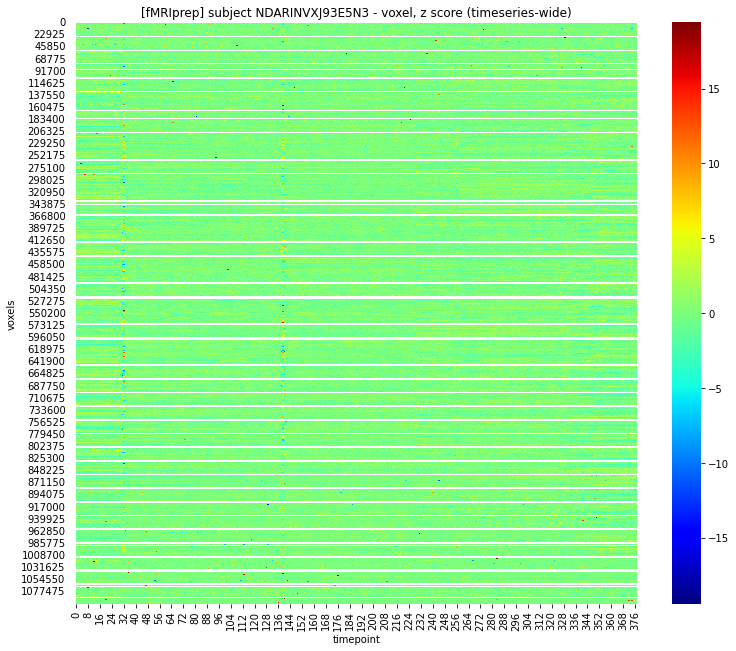

In [40]:
f, ax = plt.subplots(figsize=(11, 9))
plt.tick_params(bottom='on')

ax = sn.heatmap(z_sequence_22, cmap='jet', cbar=True)
cbar_kws={"orientation": "horizontal", "pad":0.15}
ax.tick_params(axis='y', length=0, labelrotation=0, pad=10)
ax.set_ylabel('voxels')
ax.set_xlabel('timepoint')

plt.tight_layout()

plt.title('[fMRIprep] subject NDARINVXJ93E5N3 - voxel, z score (timeseries-wide)')
plt.show()

## 2-3 motion이랑 합쳐보기

In [41]:
motion = pd.read_csv("sub-NDARINVXJ93E5N3_ses-baselineYear1Arm1_task-rest_run-01_motion.tsv", delimiter='\t')

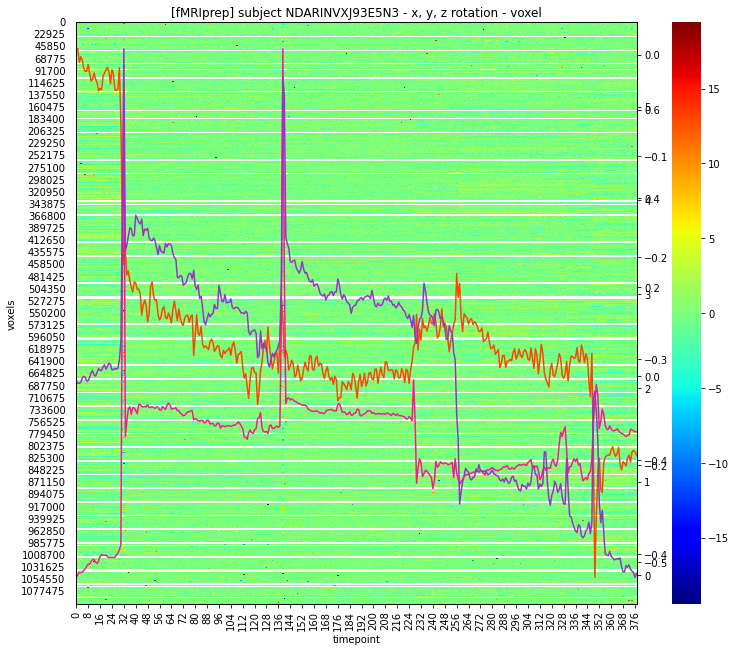

In [42]:
f, ax = plt.subplots(figsize=(11, 9))
plt.tick_params(bottom='on')

ax = sn.heatmap(z_sequence_22, cmap='jet', cbar=True)
cbar_kws={"orientation": "horizontal", "pad":0.15}
ax.tick_params(axis='y', length=0, labelrotation=0, pad=10)
ax.set_ylabel('voxels')
ax.set_xlabel('timepoint')

ax2 = ax.twinx()
z_rotation = list(np.array(motion.iloc[5:, 1:2]).reshape(-1,))
ax2.plot(z_rotation, color='orangered')
line1 = ax2.lines[0] # get the line
line1.set_xdata(line1.get_xdata()+ 0.5)
#ax2.set_ylabel('z rotation (radian)')

ax3 = ax.twinx()
x_rotation = list(np.array(motion.iloc[5:, 2:3]).reshape(-1,))
ax3.plot(x_rotation, color='deeppink')
line2 = ax3.lines[0] # get the line
line2.set_xdata(line2.get_xdata()+ 0.5)
#ax3.set_ylabel('x rotation (radian)')

ax4 = ax.twinx()
y_rotation = list(np.array(motion.iloc[5:, 3:4]).reshape(-1,))
ax4.plot(y_rotation, color='darkorchid')
line3 = ax4.lines[0] # get the line
line3.set_xdata(line3.get_xdata()+ 0.5)
#ax4.set_ylabel('y rotation (radian)')

ax.axis('tight')
ax2.axis('tight')
ax3.axis('tight')
ax4.axis('tight')

plt.tight_layout()

plt.title('[fMRIprep] subject NDARINVXJ93E5N3 - x, y, z rotation - voxel') #timepoint 332에서 outlier가 나옵니다.
plt.show()

## 2-4 outlier 찾기

In [ ]:
outlier_timepoint = []
for i in range (z_sequence_22.shape[0]):
    for j in range (z_sequence_22.shape[1]):
        if isnan(z_sequence_22[i][j]) == True:
            pass
        if z_sequence_22[i][j] > 5 or z_sequence_22[i][j] < -5:
            outlier_timepoint.append(j)
outlier_timepoint_set = set(outlier_timepoint)

In [ ]:
outlier_timepoint_raw = sorted(list(outlier_timepoint_set))

In [ ]:
len(outlier_timepoint_raw)

특정한 timepoint에서 z score 5 이상인 outlier가 검출되는 것을 확인할 수 있습니다.

# 3 raw fMRI

In [54]:
data3=nib.load('sub-NDARINVXJ93E5N3_ses-baselineYear1Arm1_task-rest_run-01_bold.nii')
mask=nib.load('sub-NDARINVXJ93E5N3_ses-baselineYear1Arm1_task-rest_run-01_mask_threshold_150.nii')
data3_arr=np.array(data3.dataobj)
mask_arr=np.array(mask.dataobj)
mask_arr_bool = mask_arr.astype(bool)
masked_data3=data3_arr[mask_arr_bool]

In [55]:
masked_data3.shape

(203161, 383)

In [22]:
data3_arr.shape

(90, 90, 60, 383)

In [56]:
nonoutlier_z = stats.zscore(masked_data3, axis=1)

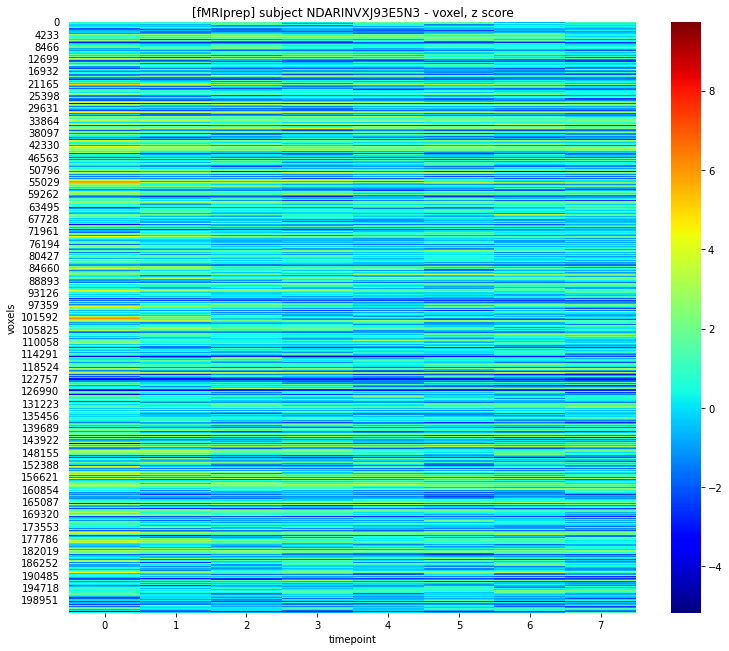

In [57]:
f, ax = plt.subplots(figsize=(11, 9))
plt.tick_params(bottom='on')

ax = sn.heatmap(nonoutlier_z[:, :8], cmap='jet', cbar=True)
cbar_kws={"orientation": "horizontal", "pad":0.15}
ax.tick_params(axis='y', length=0, labelrotation=0, pad=10)
ax.set_ylabel('voxels')
ax.set_xlabel('timepoint')

plt.tight_layout()

plt.title('[fMRIprep] subject NDARINVXJ93E5N3 - voxel, z score') #timepoint 332에서 outlier가 나옵니다.
plt.show()

## 3-1 no z score, raw fmri, voxels

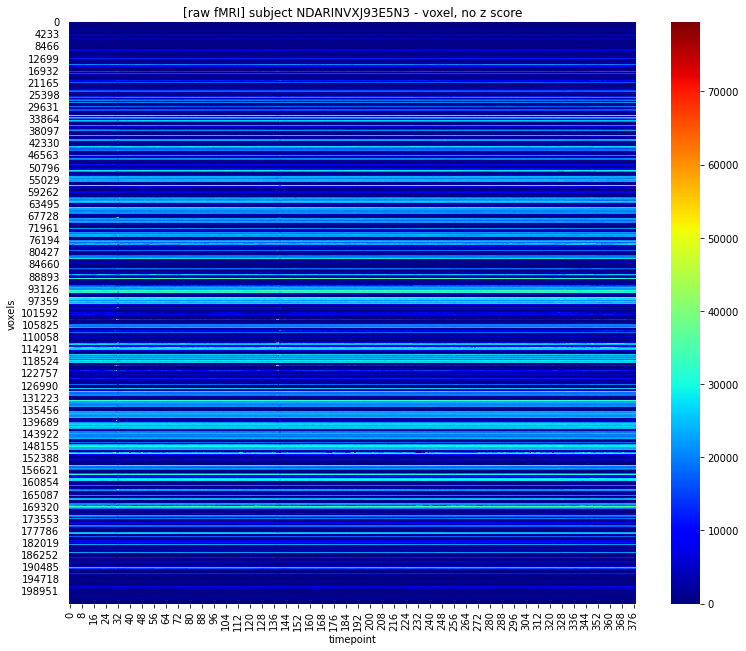

In [23]:
f, ax = plt.subplots(figsize=(11, 9))
plt.tick_params(bottom='on')

ax = sn.heatmap(masked_data3[:, 5:], cmap='jet', cbar=True)
cbar_kws={"orientation": "horizontal", "pad":0.15}
ax.tick_params(axis='y', length=0, labelrotation=0, pad=10)
ax.set_ylabel('voxels')
ax.set_xlabel('timepoint')

plt.tight_layout()

plt.title('[raw fMRI] subject NDARINVXJ93E5N3 - voxel, no z score') #timepoint 332에서 outlier가 나옵니다.
plt.show()

## 3-2 z score, raw fmri, voxels

In [24]:
z_sequence_3 = stats.zscore(masked_data3[:, 5:]) #whole array를 기준으로 z scoring

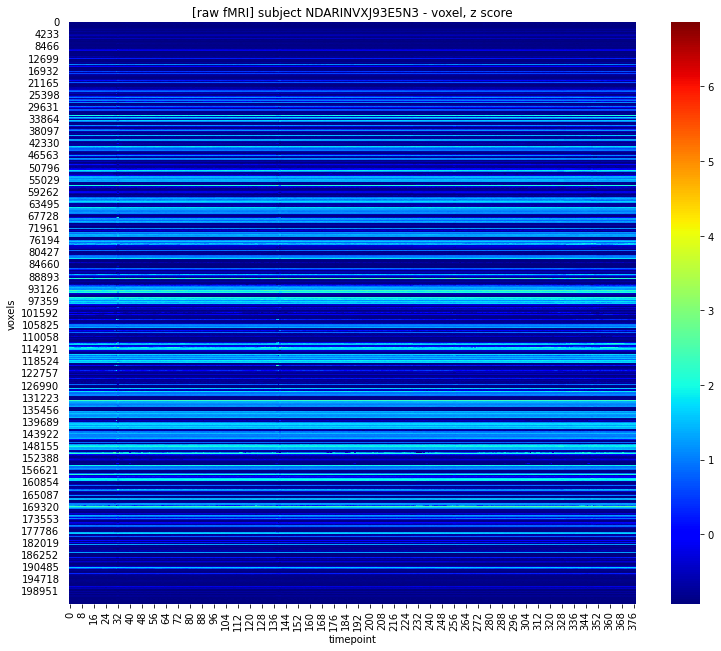

In [25]:
f, ax = plt.subplots(figsize=(11, 9))
plt.tick_params(bottom='on')

ax = sn.heatmap(z_sequence_3, cmap='jet', cbar=True)
cbar_kws={"orientation": "horizontal", "pad":0.15}
ax.tick_params(axis='y', length=0, labelrotation=0, pad=10)
ax.set_ylabel('voxels')
ax.set_xlabel('timepoint')

plt.tight_layout()

plt.title('[raw fMRI] subject NDARINVXJ93E5N3 - voxel, z score') #timepoint 332에서 outlier가 나옵니다.
plt.show()

In [26]:
z_sequence_33 = stats.zscore(masked_data3[:, 5:], axis=1) #timeseries-wide하게 z scoring

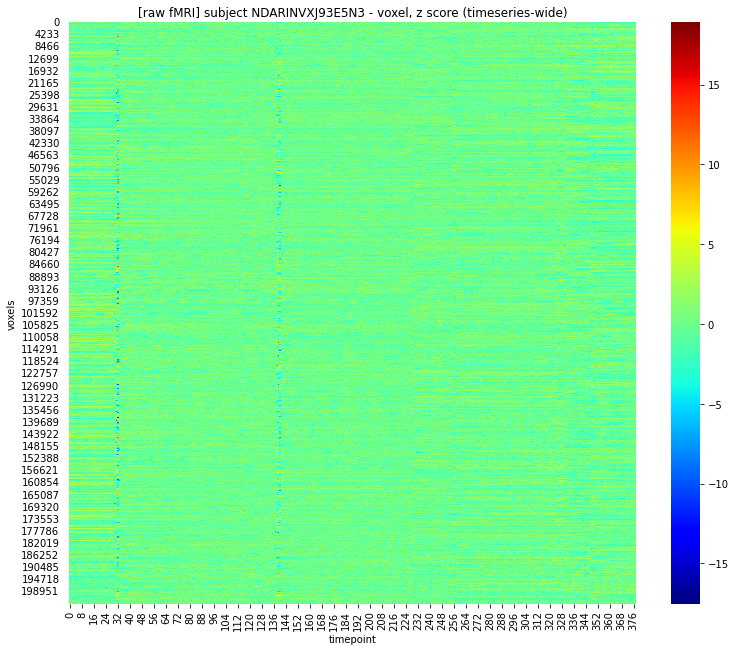

In [27]:
f, ax = plt.subplots(figsize=(11, 9))
plt.tick_params(bottom='on')

ax = sn.heatmap(z_sequence_33, cmap='jet', cbar=True)
cbar_kws={"orientation": "horizontal", "pad":0.15}
ax.tick_params(axis='y', length=0, labelrotation=0, pad=10)
ax.set_ylabel('voxels')
ax.set_xlabel('timepoint')

plt.tight_layout()

plt.title('[raw fMRI] subject NDARINVXJ93E5N3 - voxel, z score (timeseries-wide)') #timepoint 332에서 outlier가 나옵니다.
plt.show()

## 3-3 motion이랑 합쳐보기

In [28]:
import pandas as pd
motion = pd.read_csv("sub-NDARINVXJ93E5N3_ses-baselineYear1Arm1_task-rest_run-01_motion.tsv", delimiter='\t')

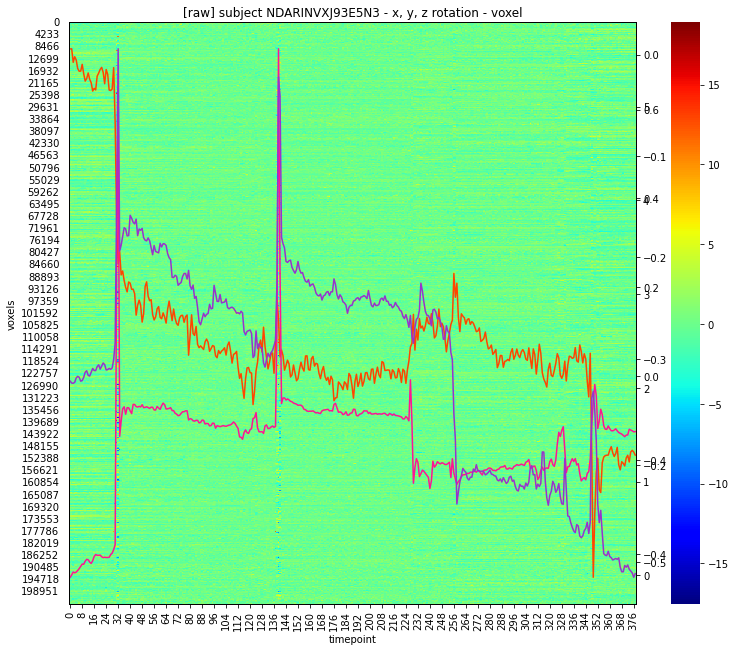

In [29]:
f, ax = plt.subplots(figsize=(11, 9))
plt.tick_params(bottom='on')

ax = sn.heatmap(z_sequence_33, cmap='jet', cbar=True)
cbar_kws={"orientation": "horizontal", "pad":0.15}
ax.tick_params(axis='y', length=0, labelrotation=0, pad=10)
ax.set_ylabel('voxels')
ax.set_xlabel('timepoint')

ax2 = ax.twinx()
z_rotation = list(np.array(motion.iloc[5:, 1:2]).reshape(-1,))
ax2.plot(z_rotation, color='orangered')
line1 = ax2.lines[0] # get the line
line1.set_xdata(line1.get_xdata()+ 0.5)
#ax2.set_ylabel('z rotation (radian)')

ax3 = ax.twinx()
x_rotation = list(np.array(motion.iloc[5:, 2:3]).reshape(-1,))
ax3.plot(x_rotation, color='deeppink')
line2 = ax3.lines[0] # get the line
line2.set_xdata(line2.get_xdata()+ 0.5)
#ax3.set_ylabel('x rotation (radian)')

ax4 = ax.twinx()
y_rotation = list(np.array(motion.iloc[5:, 3:4]).reshape(-1,))
ax4.plot(y_rotation, color='darkorchid')
line3 = ax4.lines[0] # get the line
line3.set_xdata(line3.get_xdata()+ 0.5)
#ax4.set_ylabel('y rotation (radian)')

ax.axis('tight')
ax2.axis('tight')
ax3.axis('tight')
ax4.axis('tight')

plt.tight_layout()

plt.title('[raw] subject NDARINVXJ93E5N3 - x, y, z rotation - voxel') #timepoint 332에서 outlier가 나옵니다.
plt.show()